 <font size="5"><b>Исследование продаж видеоигр интернет-магазина «Стримчик»</b></font><br />
 
 
 Интернет-магазину «Стримчик» переданы данные  о видеоиграх. Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.



**Цель исследования**
Исторические данные переданы до 2016 года, и планируется кампания на 2017-й. Нужно отработать принцип работы с данными. 

Для этого нужно провести анализ по следующим направлениям:

1.  **Исследовательский анализ данных по продажам игр, популярности платформ, влиянию рейтинга** 
2.  **Составить портрет пользователя каждого региона**
3.  **Проверить гипотезы**


**План исследования**

1 Загрузка данных

2 Предобработка данных

    2.1 приведение названия столбцов к нижнему регистру
    2.2 преобразование данных
    2.3 обработка пропусков
    2.4 расчет суммарных продаж во всех регионах
3 Исследовательский анализ

    3.1 количество игр, выпускаемых в разные годы
    3.2 как менялись продажи по платформам
    3.3 актуальные данные в датасете
    3.4 лидирующие платформы
    3.5 график "ящик с усами" по глобальным продажам в разбивке по платформам
    3.6 диаграмма рассеяния и корреляция между отзывами и продажами внутри одной популярной платформы
    3.7 соотношение выводов с проодажами игр на других платформах
    3.8 общее распределение игр по жанрам. Жанры с высокими и низкими продажами
4 Портрет пользователя для каждого региона (NA, EU, JP) 

    4.1 самые популярные платформы (топ-5)
    4.2 самые популярныежанры (топ-5)
    4.3 влияние рейтинга ESRB на продажи в каждом регионе
5 Проверка гипотез
    
    5.1 средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    5.2 средние пользовательские рейтинги жанров Action и Sports разные
6 Общий вывод

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

#### Шаг 1. Загрузка данных

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


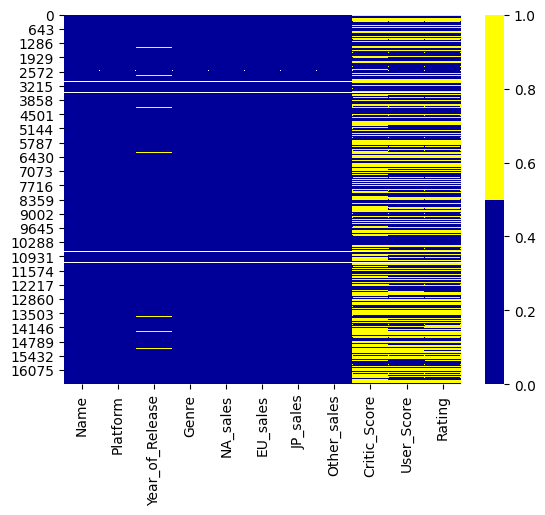

In [5]:
# тепловая карта пропущенных значений 
cols = data.columns
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours), linewidths=.00001);

Вывод. В датасете имеется много пустых значений в оценках и рейтинге игр.

#### Шаг 2. Предобработка данных

##### Приведение названия столбцов  к нижнему регистру

In [6]:
data.columns = data.columns.str.lower() # преобразование имен столбцов в нижний регистр

##### Преобразование данных

In [7]:
data.isnull().sum() # пустые значения

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
# посмотрим на строки с пустуми значениями 'name'
data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Названия и жанр игр отсутсвуют в двух одинаковых строках. Они не несут полезной информации и их невозможно заполнить синтетическими данными, поэтому удалим их.

In [9]:
data = data.drop(index=[ 659 , 14244 ]) # удаляем незаполненные строки

In [10]:
# заполняем пропущенные значения релиза игр заглушкой - нулем
data['year_of_release'] = data['year_of_release'].fillna(0)

In [11]:
data['year_of_release']

0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16710    2016.0
16711    2006.0
16712    2016.0
16713    2003.0
16714    2016.0
Name: year_of_release, Length: 16713, dtype: float64

In [12]:
data['year_of_release'] = data['year_of_release'].apply(int) # преобразуем год в челочисленный формат

In [13]:
data['user_score'].value_counts().sort_values(ascending=True) # значения пользовательских оценок
# sorted(data['user_score'], key=float)

9.7       1
0         1
9.6       2
0.6       2
0.9       2
       ... 
8.3     254
8.2     282
8       290
7.8     324
tbd    2424
Name: user_score, Length: 96, dtype: int64

In [14]:
data['critic_score'].value_counts() # значения оценок критиков

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
29.0      3
13.0      1
22.0      1
17.0      1
21.0      1
Name: critic_score, Length: 82, dtype: int64

In [15]:
# приведем оценки критиков и пользовательские к единой 10 бальной шкале измерения
data['critic_score_10'] = data['critic_score'] / 10
# округляем оценки критиков с помощью «потолка»
data['critic_score_10'] = np.ceil(data['critic_score_10'])

In [16]:
data.loc[(data['user_score'] == 'tbd'), 'user_score'] = np.nan # проставляем NaN вместо tbd

In [17]:
data['user_score'].head(2)

0      8
1    NaN
Name: user_score, dtype: object

In [18]:
data['user_score'] = round(data['user_score'].apply(float)) # преобразуем рейтинг в вещественный тип данных

In [19]:
data['user_score'].head(2)

0    8.0
1    NaN
Name: user_score, dtype: float64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  critic_score_10  8137 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.7+ MB


##### Обработка пропусков

Пользовательская оценка tbd (to be determined) означает, что рейтинг не определен в силу недостаточного количества голосов. Для анализа необходимо заменить такие строковые данные на NaN.
Оценка проф. критиков измеряется по 100-бальной шкале, приведем ее к 10-бальной, как пользовательскую, для корректного анализа и сравнений, создав новый столбец 'critic_score_10' и округлив "к потолку" методом ceil(). 
Для возможного заполнения недостающих значений пользовательских оценок оценками критиков и наоброт проверим корреляцию между ними и корреляцию этих оценок по одним и тем же играм, но на разных платформах. Если корреляция будет больше 0.75, то взаимная подставка одной оценки другой будет корректной.

In [21]:
data['name'].value_counts().sort_values() # проверка повторяемости упоминания одних и тех игр для разных платформ

One Piece Unlimited Cruise SP     1
River Raid II                     1
Valhalla Knights 3                1
Wave Race 64                      1
EX Monopoly                       1
                                 ..
LEGO Marvel Super Heroes          9
Madden NFL 07                     9
FIFA 14                           9
Ratatouille                       9
Need for Speed: Most Wanted      12
Name: name, Length: 11559, dtype: int64

In [22]:
# отберем во временный df только заполненные столбцы с оценками
temp_data = data[data[['critic_score', 'user_score']].notnull().all(1)]

In [23]:
temp_data = temp_data.copy()

In [24]:
temp_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,critic_score_10
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,8.0
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.0,E,9.0
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,8.0
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.0,E,9.0
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,7.0,E,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16673,Mortal Kombat: Deadly Alliance,GBA,2002,Fighting,0.01,0.00,0.00,0.00,81.0,9.0,M,9.0
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,8.0,M,8.0
16696,Breach,PC,2011,Shooter,0.01,0.00,0.00,0.00,61.0,6.0,T,7.0
16702,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.00,0.00,60.0,7.0,E10+,6.0


In [25]:
temp_data[['user_score', 'critic_score_10']].corr()

,user_score,critic_score_10
user_score,1.00000,0.55677
critic_score_10,0.55677,1.00000


Вывод: корреляция между оценками пользователей и оценками критиков слабая, заполнять пустые значения на их основании некорректно.

In [26]:
# сгруппируем df по названиям игр и проверим корреляцию по разным платформам
temp2_data = temp_data.groupby('name').agg({'user_score':'mean', 'critic_score_10':'mean'})

In [27]:
temp2_data

,user_score,critic_score_10
name,,
Tales of Xillia 2,8.0,8.0
.hack//Infection Part 1,8.0,8.0
.hack//Mutation Part 2,9.0,8.0
.hack//Outbreak Part 3,9.0,7.0
007 Racing,5.0,6.0
...,...,...
inFAMOUS 2,8.0,9.0
inFAMOUS: Second Son,8.0,8.0
nail'd,6.5,7.0


In [28]:
temp2_data.corr()

,user_score,critic_score_10
user_score,1.000000,0.610418
critic_score_10,0.610418,1.000000


Вывод. Корреляция по оценкам одних и тех же игр на разных платформах тоже слабая, заполнить пропущенные строки по ним не получится. Оставляем эти данные с пустыми значениями.

In [29]:
data.duplicated().sum() # поиск дубликатов

0

In [30]:
# копия датафрейма для поиска дубликатов по значениям строки в нескольких столбцах
data_copy = data.copy()

In [31]:
# приводим категориальные значения df к нижнему регистру
data_copy['name'] = data_copy['name'].str.lower()
data_copy['platform'] = data_copy['platform'].str.lower()
data_copy['genre'] = data_copy['genre'].str.lower()

In [32]:
# поиск дубликатов по нескольким столбцам: ['name', 'platform', 'year_of_release']
data_dubl = data_copy.duplicated(subset=['name', 'platform', 'year_of_release'])
data_dubl.value_counts()

False    16712
True         1
dtype: int64

In [33]:
# определяем индекс значения True
data_dubl.loc[data_dubl == True].index

Int64Index([16230], dtype='int64')

In [34]:
data = data.drop(index=[16230]) # удаляем дубликат по индексу в исходном df

##### Расчет суммарных продаж во всех регионах

In [35]:
# добавим столбец 'total_sales' - суммарные продажи во всех регионах
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [36]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,critic_score_10,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,8.0,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.0,E,9.0,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,8.0,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,NaN,0.01


In [37]:
# Показатели о глобальных продажах отдельных игр, минимальные, максимальные и медианные значения
(
     data[['total_sales']]
    .apply (['min', 'median', 'max'])   
    .style.format("{:,.2f}")
)

,total_sales
min,0.00
median,0.17
max,82.54


Вывод. Минимальные суммарные продажи по всему миру отдельно взятых игр составили меньше 10 тыс копий, максимальные продажи - больше 82 млн копий. Медианное значение в районе 170 тыс копий.

#### Шаг 3. Исследовательский анализ данных

##### Количество игр, выпускаемых в разные годы

In [38]:
data_releases = data.pivot_table(index='year_of_release', values='name', aggfunc=('count'))

In [39]:
data_releases.columns = ['count'] # переименовываем столбец 'name'

In [40]:
data_releases = data_releases.reset_index() # сброс мультииндекса

In [41]:
data_releases

,year_of_release,count
0,0,269
1,1980,9
2,1981,46
3,1982,36
4,1983,17
5,1984,14
6,1985,14
7,1986,21
8,1987,16
9,1988,15


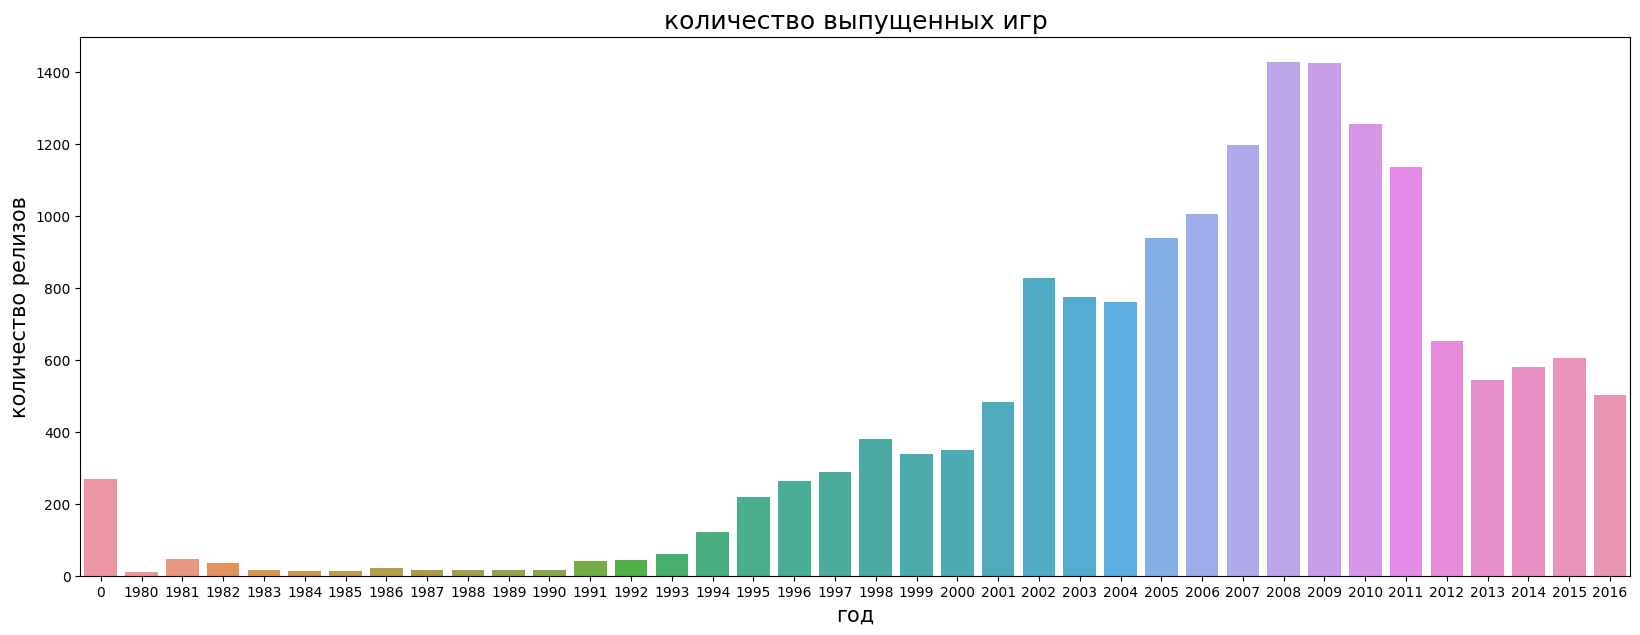

In [42]:
# построение графика
plt.figure(figsize=(20,7))
sns.barplot(x='year_of_release', 
            y='count', 
            data=data_releases);

# устанавливаем метки
plt.xlabel('год', size=15)
plt.ylabel('количество релизов', size=15)
plt.title('количество выпущенных игр', size=18);

Вывод. С 1980 по 1990 год количество выпускаемых игр было незначительным - несколько десятков. Однако с 1991 по 2009 года наблюдался сильный рост количетсва выпускаемых игр: по нескольку сотен в месяц. С 2010 по 2013 наблюдался спад, затем до 2016 года количество релизов снова стало расти.

 ##### Как менялись продажи по платформам

In [43]:
# сводная таблица продаж игр на разных платформах по годам
data_platform = data.pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc=('sum'))

In [44]:
data_platform = data_platform.reset_index() # сброс мультииндекса

In [45]:
data_platform

,platform,year_of_release,total_sales
0,2600,0,10.50
1,2600,1980,11.38
2,2600,1981,35.68
3,2600,1982,28.88
4,2600,1983,5.84
...,...,...,...
249,XB,2008,0.18
250,XOne,2013,18.96
251,XOne,2014,54.07
252,XOne,2015,60.14


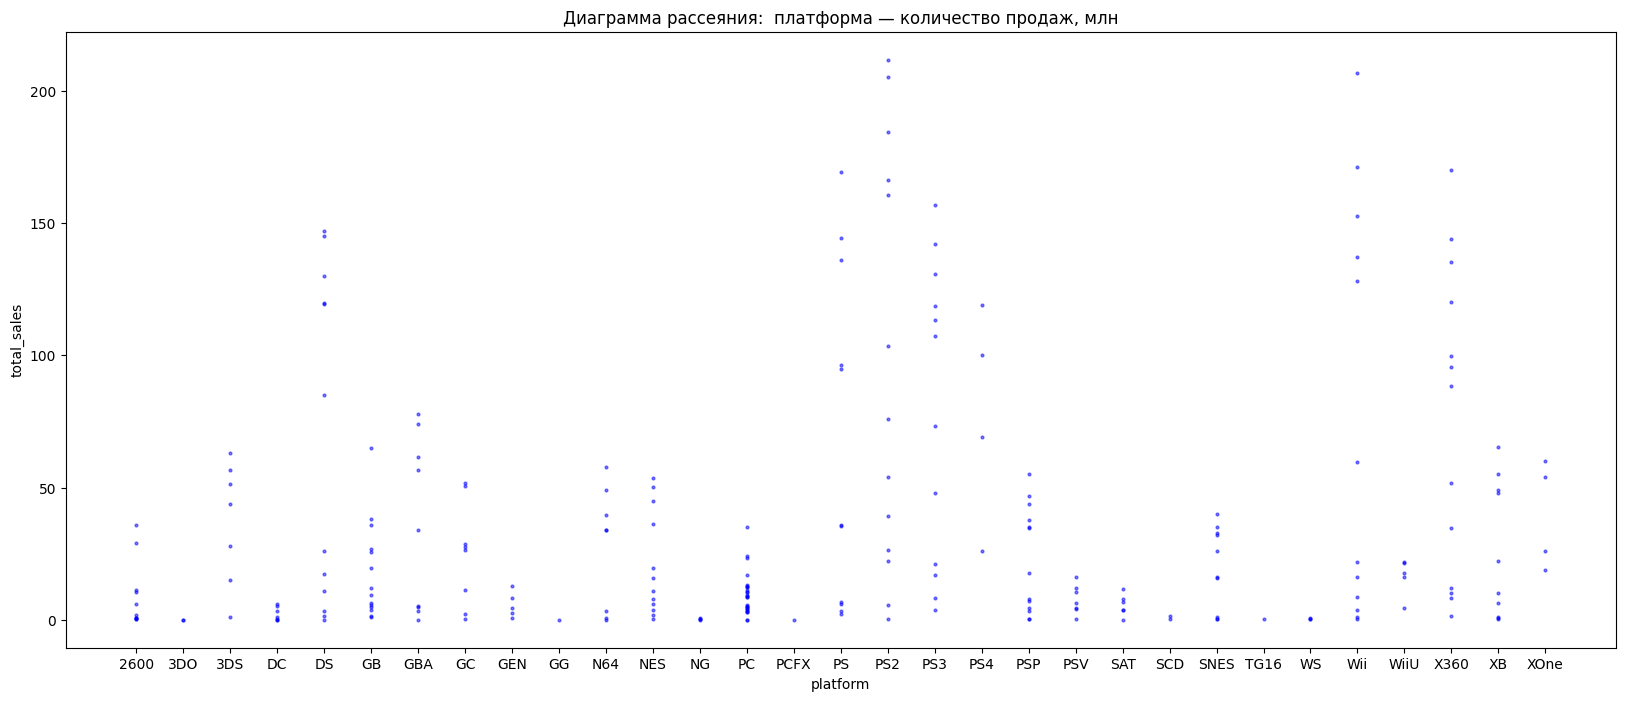

In [46]:
# диаграмма рассеяния продаж игр на разных платформах
data_platform.plot(kind='scatter', 
        y='total_sales' , x='platform', alpha=0.5, figsize=(20,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния:  платформа — количество продаж, млн');

Вывод. Наибольший размах продаж игр наблюдается у следующих платформ: DS, PS, PS2, PS3, PS4, Wii, X360.

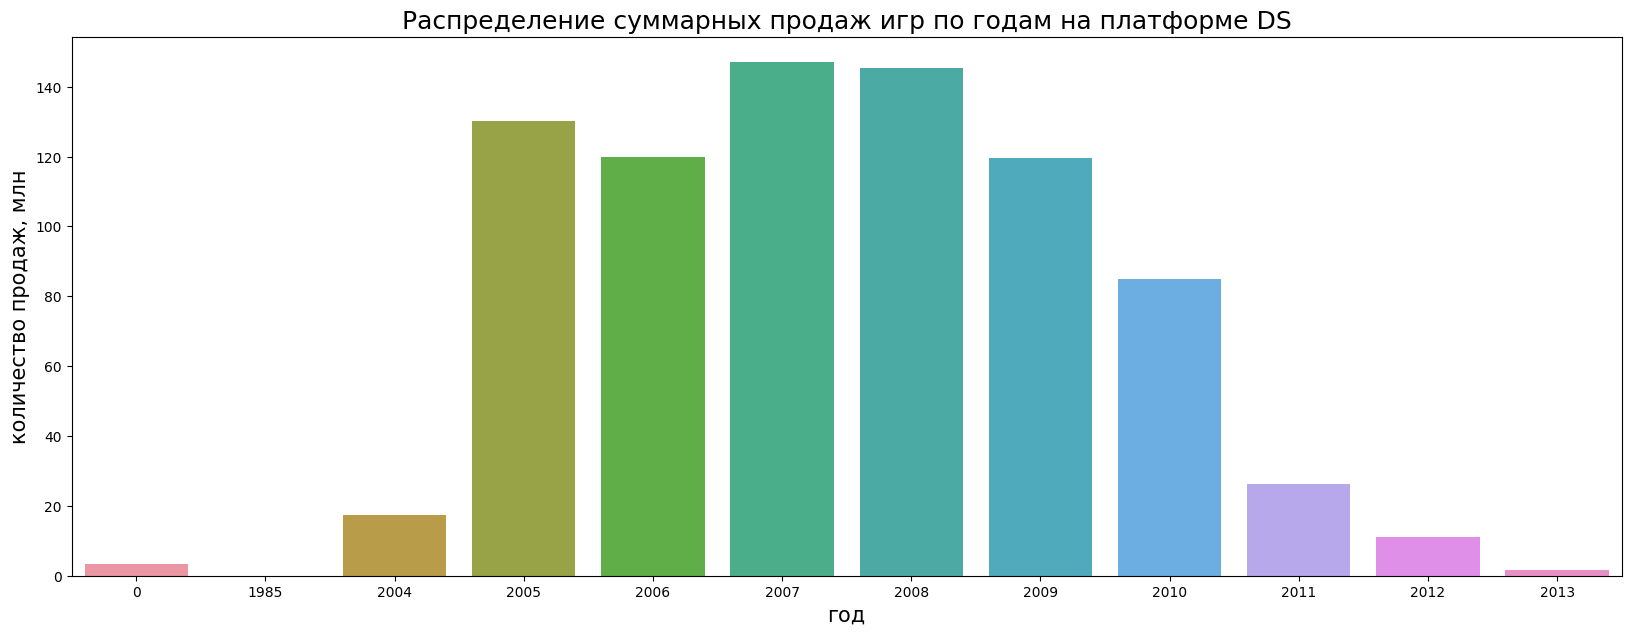

In [47]:
data_ds = data_platform.query('platform == "DS"')
# построение графика
plt.figure(figsize=(20,7))
sns.barplot(x='year_of_release', 
            y='total_sales', 
            data=data_ds);

# устанавливаем метки
plt.xlabel('год', size=15)
plt.ylabel('количество продаж, млн', size=15)


plt.title('Распределение суммарных продаж игр по годам на платформе DS', size=18);

In [48]:
# платформа DS вупущена в 2004, данные за 1985 г - аномальные
data_ds.loc[(data_ds['year_of_release'] == 1985)]

,platform,year_of_release,total_sales
28,DS,1985,0.02


In [49]:
# определяем индекс в исходном df по аномальным значениям
data.loc[((data['year_of_release'] == 1985) & (data['platform'] == 'DS') & (data['total_sales'] == 0.02))].index

Int64Index([15957], dtype='int64')

In [50]:
data = data.drop(index=[15957]) # удаляем аномалии в исходном df

In [51]:
# заново перечитаем данные из обновленного исходного df
data_platform = data.pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc=('sum'))
data_platform = data_platform.reset_index() # сброс мультииндекса

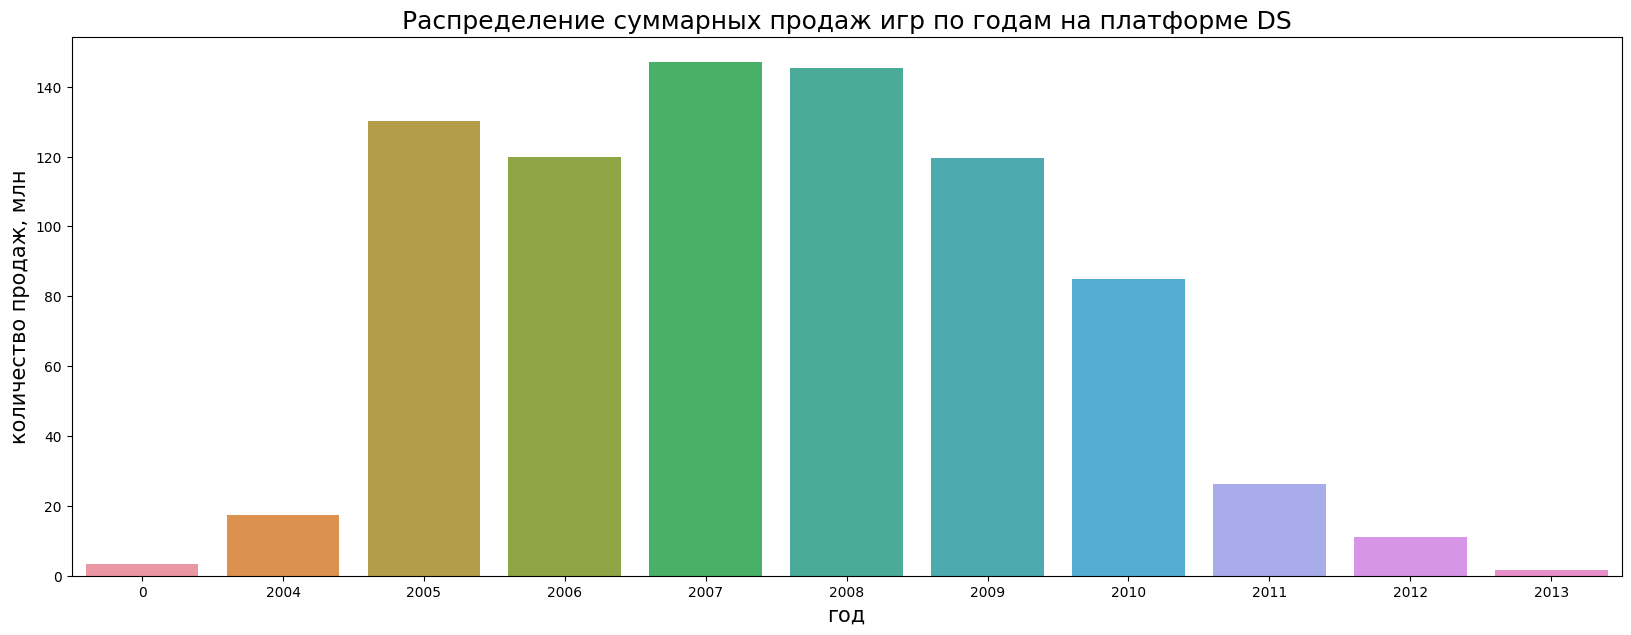

In [52]:
data_ds = data_platform.query('platform == "DS"')
# построение графика заново
plt.figure(figsize=(20,7))
sns.barplot(x='year_of_release', 
            y='total_sales', 
            data=data_ds);

# устанавливаем метки
plt.xlabel('год', size=15)
plt.ylabel('количество продаж, млн', size=15)


plt.title('Распределение суммарных продаж игр по годам на платформе DS', size=18);

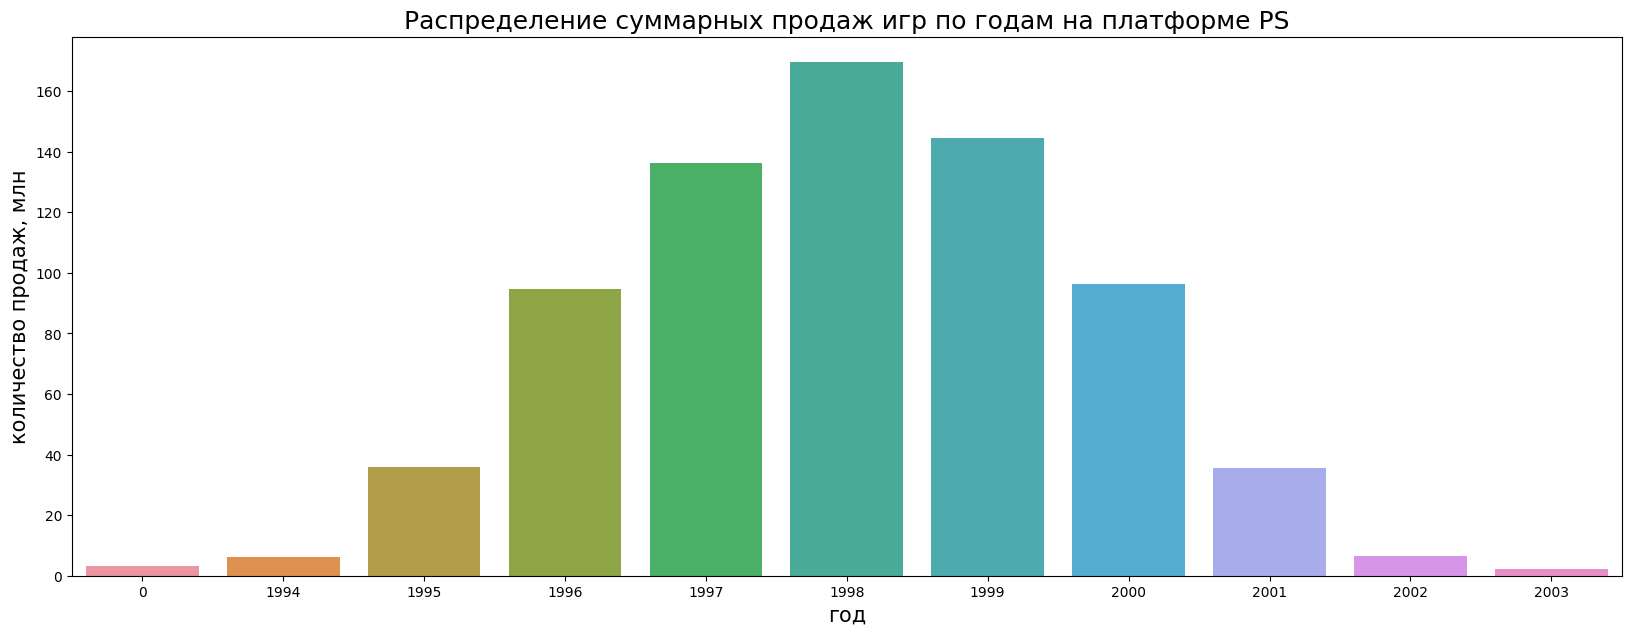

In [53]:
data_ps = data_platform.query('platform == "PS"')
# построение графика
plt.figure(figsize=(20,7))
sns.barplot(x='year_of_release', 
            y='total_sales', 
            data=data_ps);

# устанавливаем метки
plt.xlabel('год', size=15)
plt.ylabel('количество продаж, млн', size=15)
plt.title('Распределение суммарных продаж игр по годам на платформе PS', size=18);

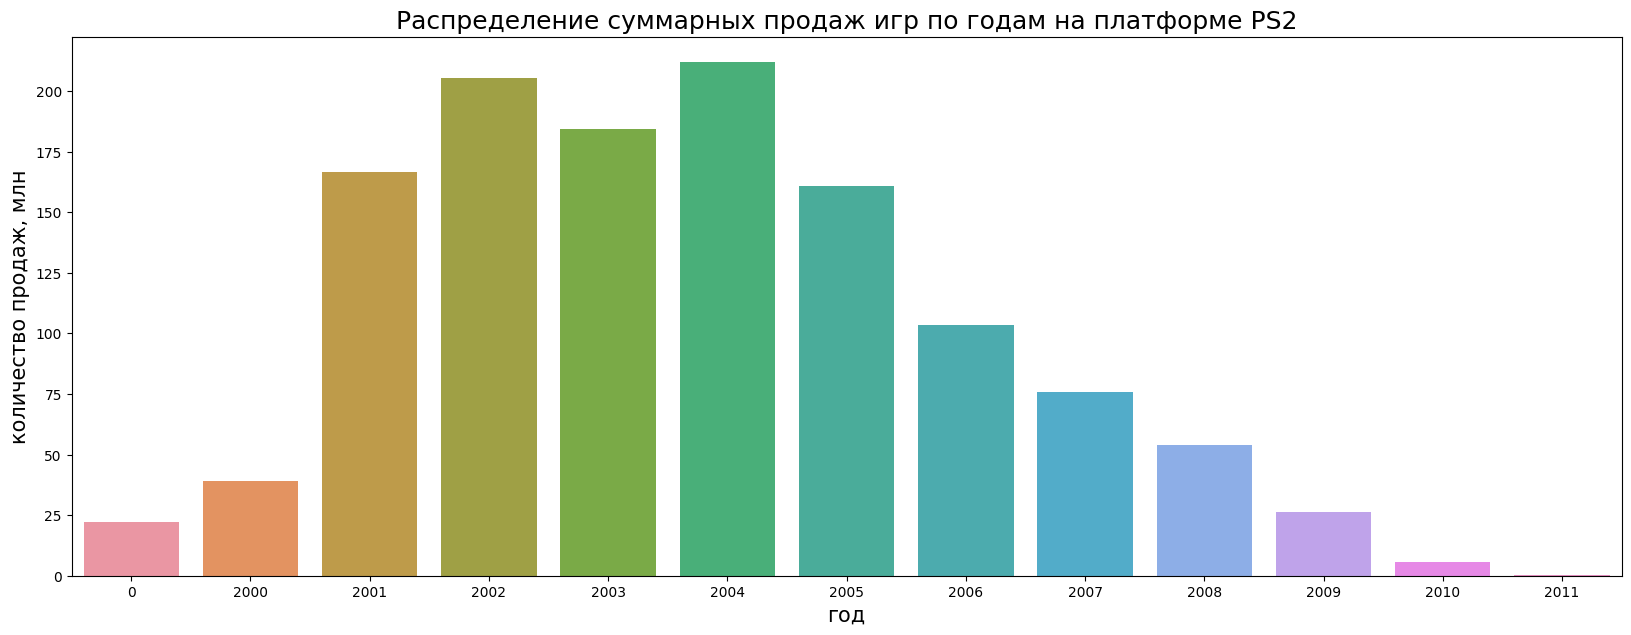

In [54]:
data_ps2 = data_platform.query('platform == "PS2"')
# построение графика
plt.figure(figsize=(20,7))
sns.barplot(x='year_of_release', 
            y='total_sales', 
            data=data_ps2);

# устанавливаем метки
plt.xlabel('год', size=15)
plt.ylabel('количество продаж, млн', size=15)
plt.title('Распределение суммарных продаж игр по годам на платформе PS2', size=18);

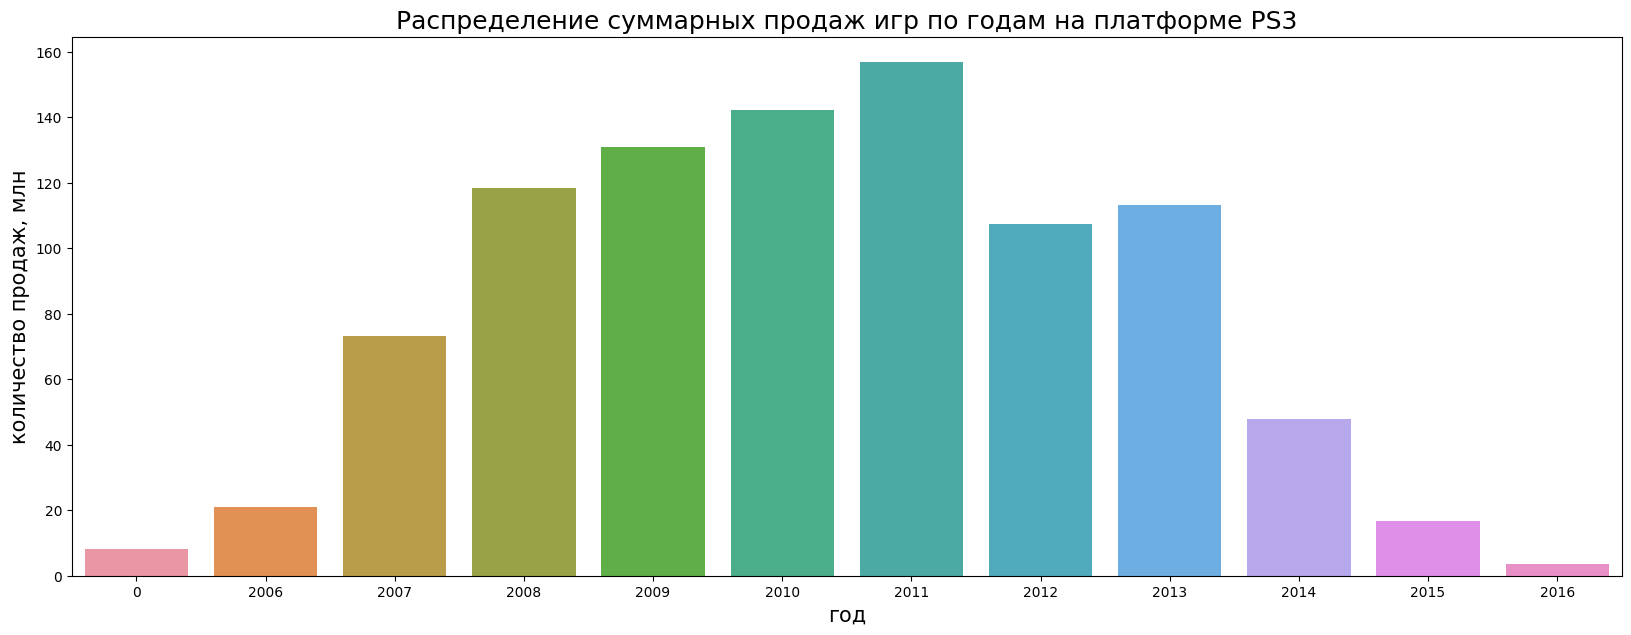

In [55]:
data_ps3 = data_platform.query('platform == "PS3"')
# построение графика
plt.figure(figsize=(20,7))
sns.barplot(x='year_of_release', 
            y='total_sales', 
            data=data_ps3);

# устанавливаем метки
plt.xlabel('год', size=15)
plt.ylabel('количество продаж, млн', size=15)
plt.title('Распределение суммарных продаж игр по годам на платформе PS3', size=18);

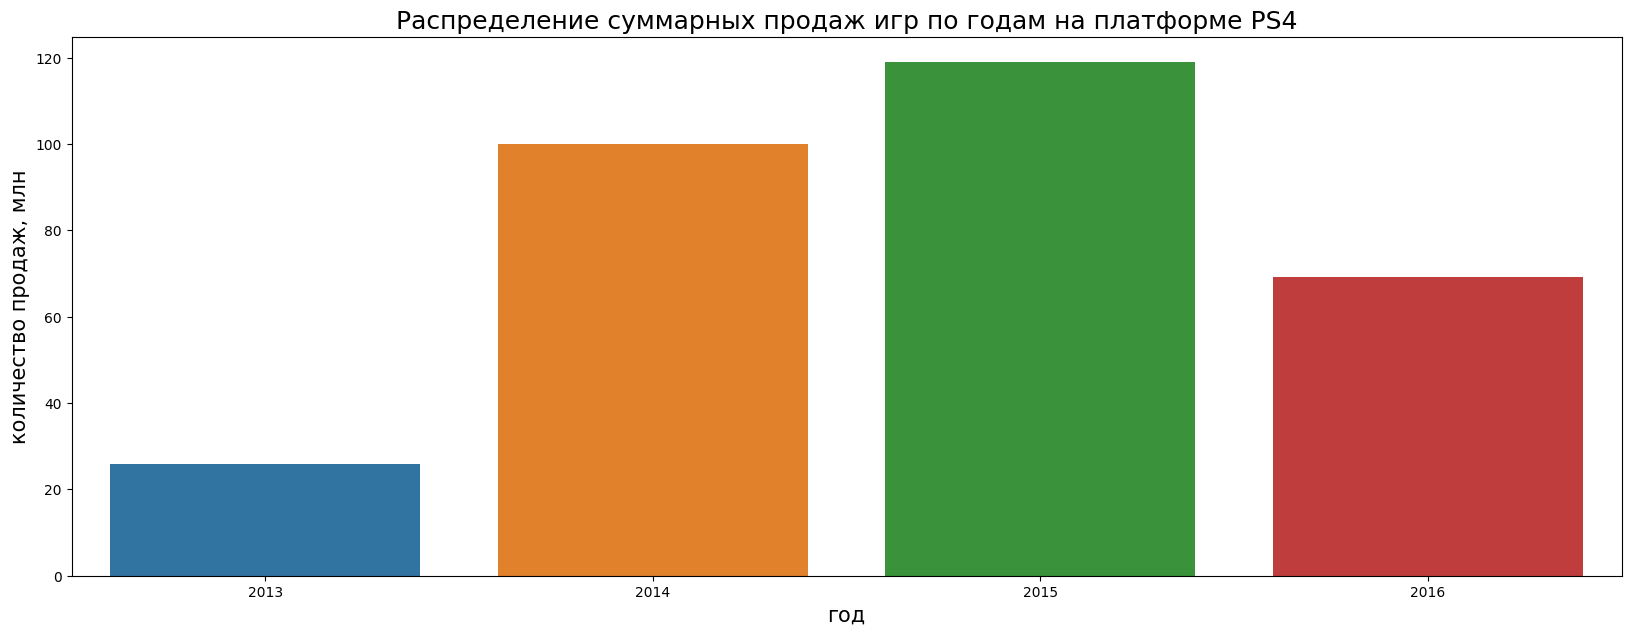

In [56]:
data_ps4 = data_platform.query('platform == "PS4"')
# построение графика
plt.figure(figsize=(20,7))
sns.barplot(x='year_of_release', 
            y='total_sales', 
            data=data_ps4);

# устанавливаем метки
plt.xlabel('год', size=15)
plt.ylabel('количество продаж, млн', size=15)
plt.title('Распределение суммарных продаж игр по годам на платформе PS4', size=18);

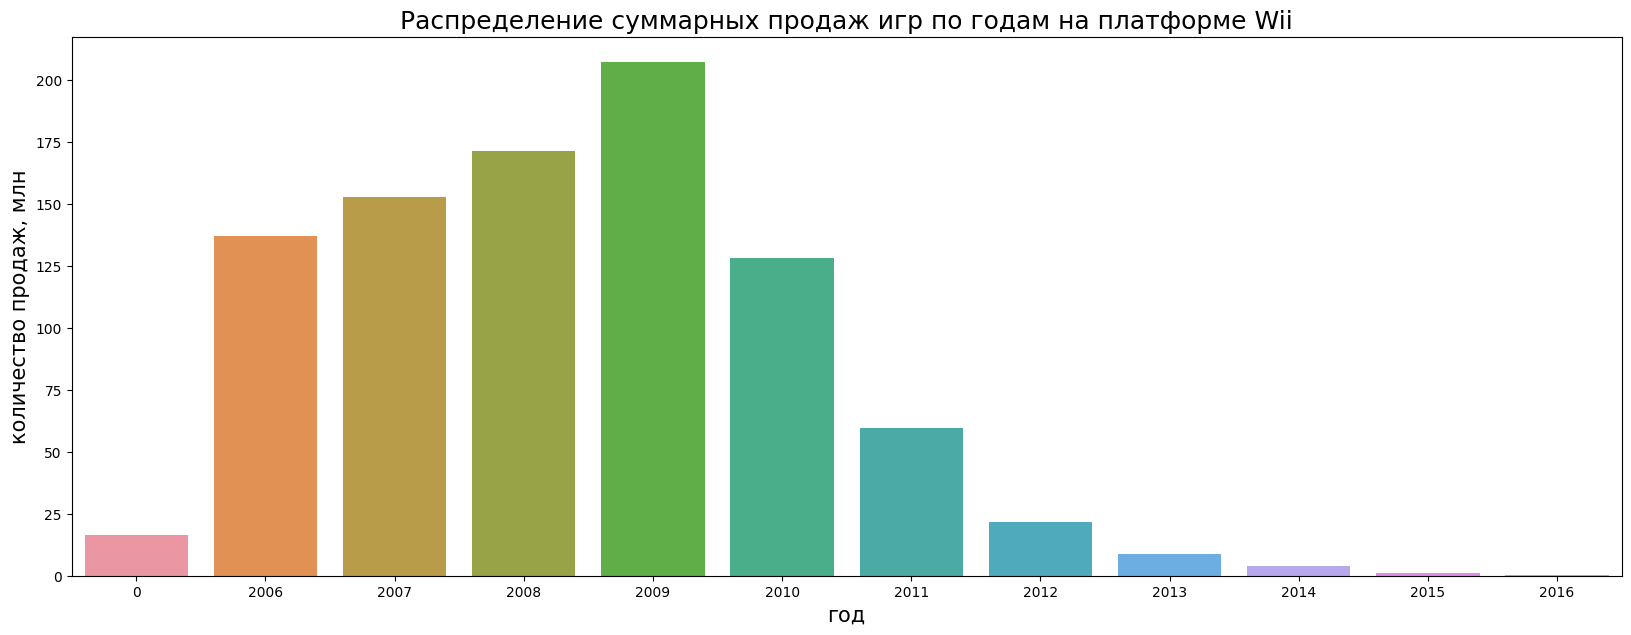

In [57]:
data_wii = data_platform.query('platform == "Wii"')
# построение графика
plt.figure(figsize=(20,7))
sns.barplot(x='year_of_release', 
            y='total_sales', 
            data=data_wii);

# устанавливаем метки
plt.xlabel('год', size=15)
plt.ylabel('количество продаж, млн', size=15)
plt.title('Распределение суммарных продаж игр по годам на платформе Wii', size=18);

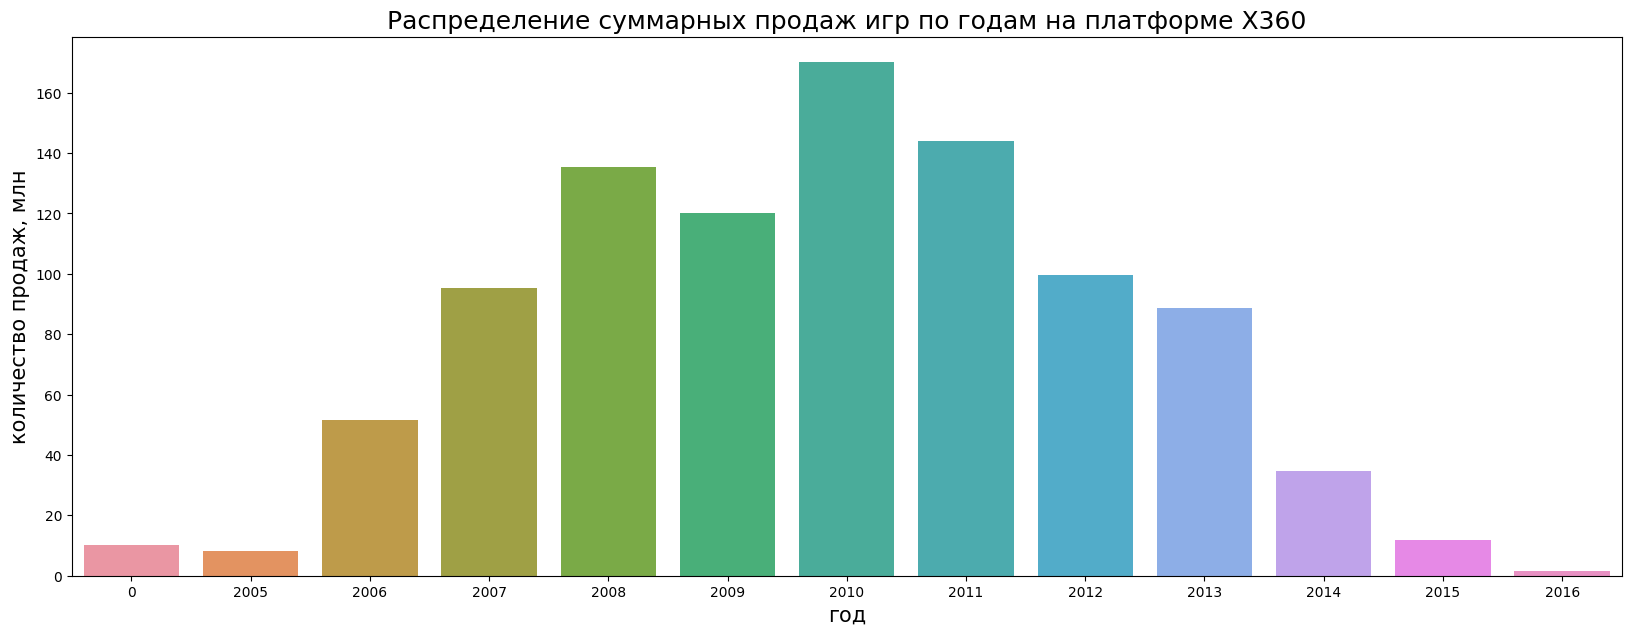

In [58]:
data_x360 = data_platform.query('platform == "X360"')
# построение графика
plt.figure(figsize=(20,7))
sns.barplot(x='year_of_release', 
            y='total_sales', 
            data=data_x360);

# устанавливаем метки
plt.xlabel('год', size=15)
plt.ylabel('количество продаж, млн', size=15)
plt.title('Распределение суммарных продаж игр по годам на платформе X360', size=18);

Вывод. Характерный срок жизни игровой платформы - 11-12 лет.

##### Актуальные данные в датасете

Так как по условиям задания данные за последний 2016 год в датасете неполные, проанализируем данные за 2014 и 2015 года, чтобы понять динамику. Неполные данные за 2016 год дают возможность оценить потенциал платформ с учетом их роста за предыдущий год.

In [59]:
# срез данных 2014-2016 
data_act = data.query('year_of_release >= 2014')
data_act.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,critic_score_10,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.0,M,10.0,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.0,E,9.0,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,NaN,7.98


##### Лидирующие платформы

In [60]:
# сводная таблица по суммарным продажам игр для каждой платформы по актуальным данным
data_lid = data_act.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')

In [61]:
data_lid

year_of_release,2014,2015,2016
platform,,,
3DS,43.76,27.78,15.14
PC,13.28,8.52,5.25
PS3,47.76,16.82,3.60
PS4,100.00,118.90,69.25
PSP,0.24,0.12,NaN
PSV,11.90,6.25,4.25
Wii,3.75,1.14,0.18
WiiU,22.03,16.35,4.60
X360,34.74,11.96,1.52


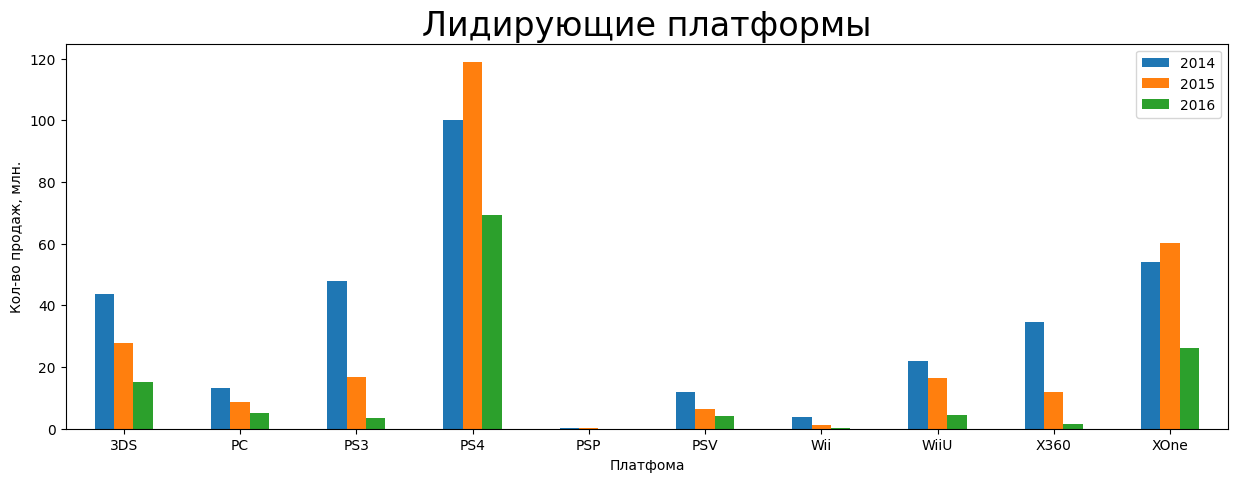

In [62]:
data_lid.plot(kind='bar', xlabel='Платфома', ylabel='Кол-во продаж, млн.', figsize=(15,5))
plt.title('Лидирующие платформы', fontsize=24)
plt.legend (('2014', '2015', '2016'));
plt.xticks(rotation='horizontal');

Вывод. По продажам лидируют PS4, XOne, 3DS. Из них продажи растут у первых двух, а у 3DS падают. Исходя из неполных данных по 2016 году и росту продаж в 2015 году, потенциально очень прибыльные платформы: PS4 и XOne имеют шансы дойти до уровня 2015 года. Также в 2016 году по росту продаж игр имеют шансы  PC и PSV, так как уже почти достигли показателей предыдущего года. Отдельно можно выделить платформы 3DS и WiiU, которые несмотря на падение продаж, продают большие объемы игр (15-20 млн в год). 
Остальные платформы продают незначительные объемы на рынке и показывают спад продаж.

##### График «ящик с усами» по глобальным продажам игр в разбивке по платформам

Посторим диаграмму размаха по последним полным актуальным данным (2015 год) для соответсвующих платформ: 3DS, PC, PS3, PS4, PSV, Wii, WiiU, X360, Xone.

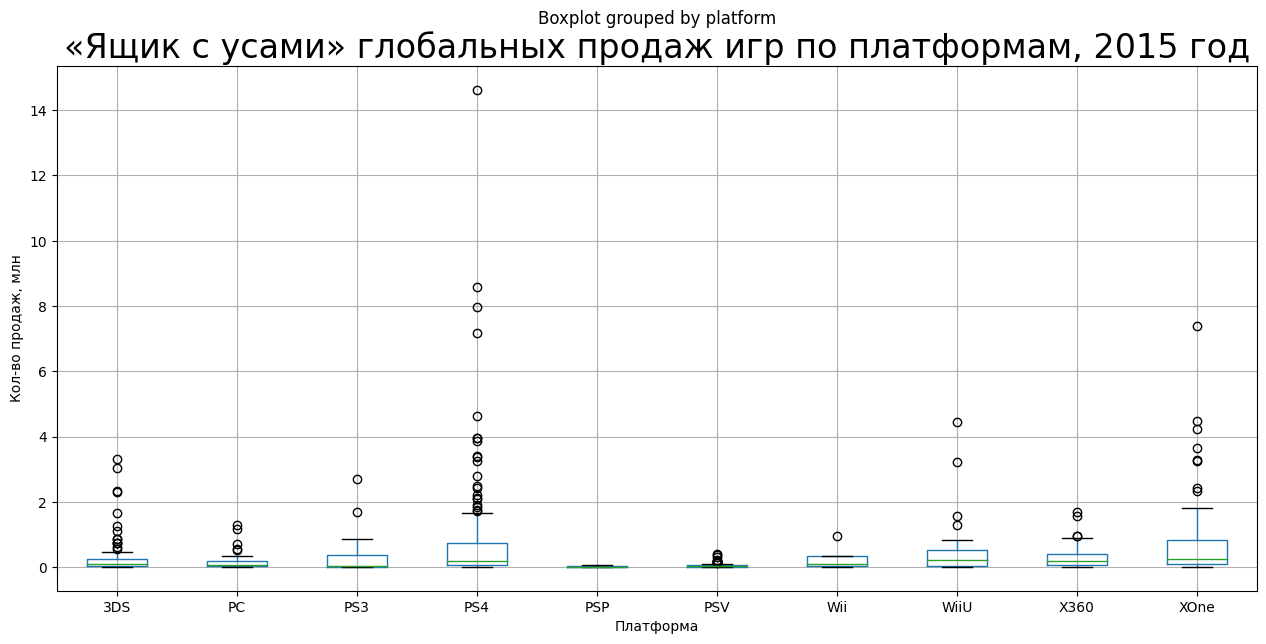

In [63]:
ax = data.query('year_of_release == 2015').boxplot(column='total_sales', by='platform', figsize=(15,7));
ax.set_title('«Ящик с усами» глобальных продаж игр по платформам, 2015 год', fontsize=24);
ax.set_xlabel('Платформа');
ax.set_ylabel('Кол-во продаж, млн');

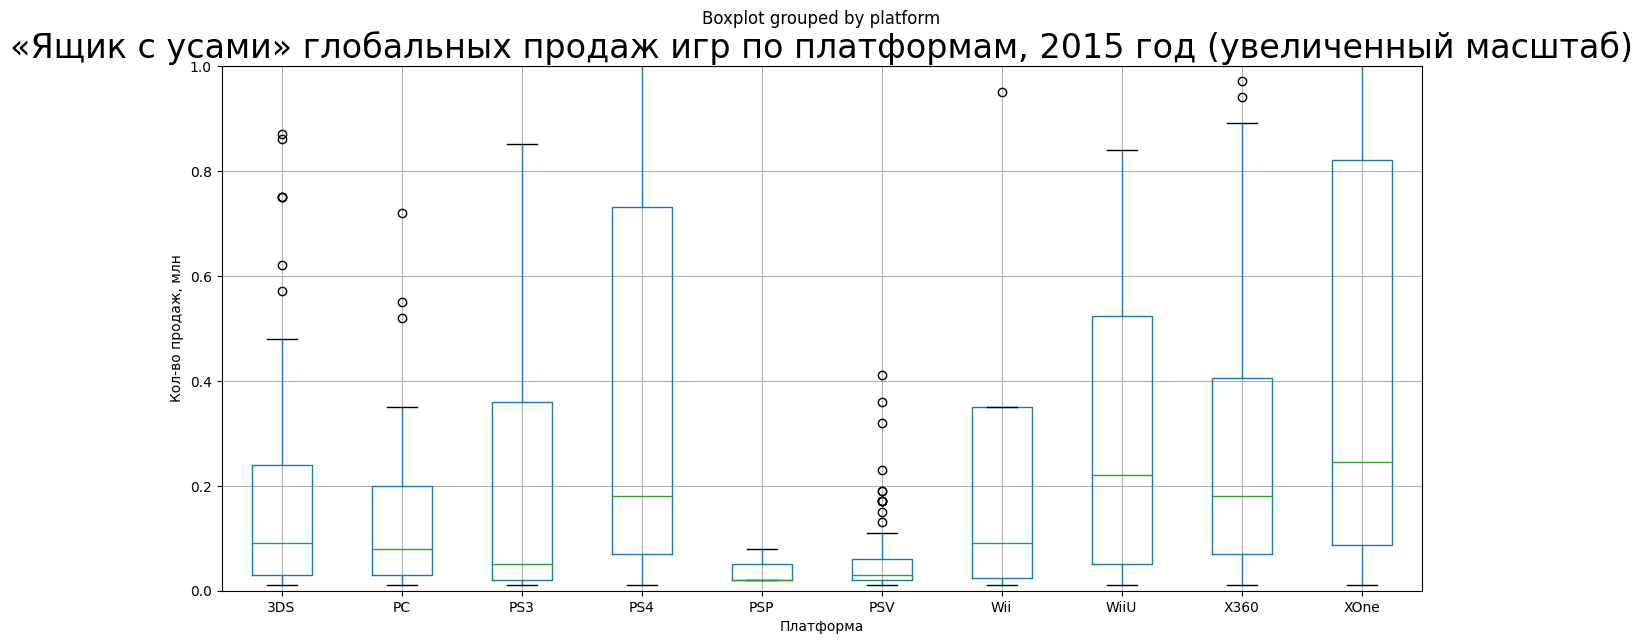

In [64]:
ax = data.query('year_of_release == 2015').boxplot(column='total_sales', by='platform', figsize=(15,7));
ax.set_ylim(0, 1);
ax.set_title('«Ящик с усами» глобальных продаж игр по платформам, 2015 год (увеличенный масштаб)', fontsize=24);
ax.set_xlabel('Платформа');
ax.set_ylabel('Кол-во продаж, млн');

In [65]:
# Показатели о глобальных продажах в датасете, минимальные, максимальные и средние значения
data.query('year_of_release == 2015')[['total_sales']].apply(['min', 'median', 'max']).style.format("{:,.2f}")

,total_sales
min,0.01
median,0.09
max,14.63


Вывод. За 2015 год медианные продажи всех платформ составили менее 200 тыс, WiiU и XOne превысили этот показатель. У этих двух платформ в "выбросах" наблюдаются наиболее продаваемые игры, превыщающие 4 и 7 млн соответственно, но самые высокие продажи у PS4, превышающие 14 млн. копий.

##### Диаграмма рассеяния и корреляция между отзывами и продажами внутри одной популярной платформы

Рассмотрим корреляцию на примере популярной платформы PS4.

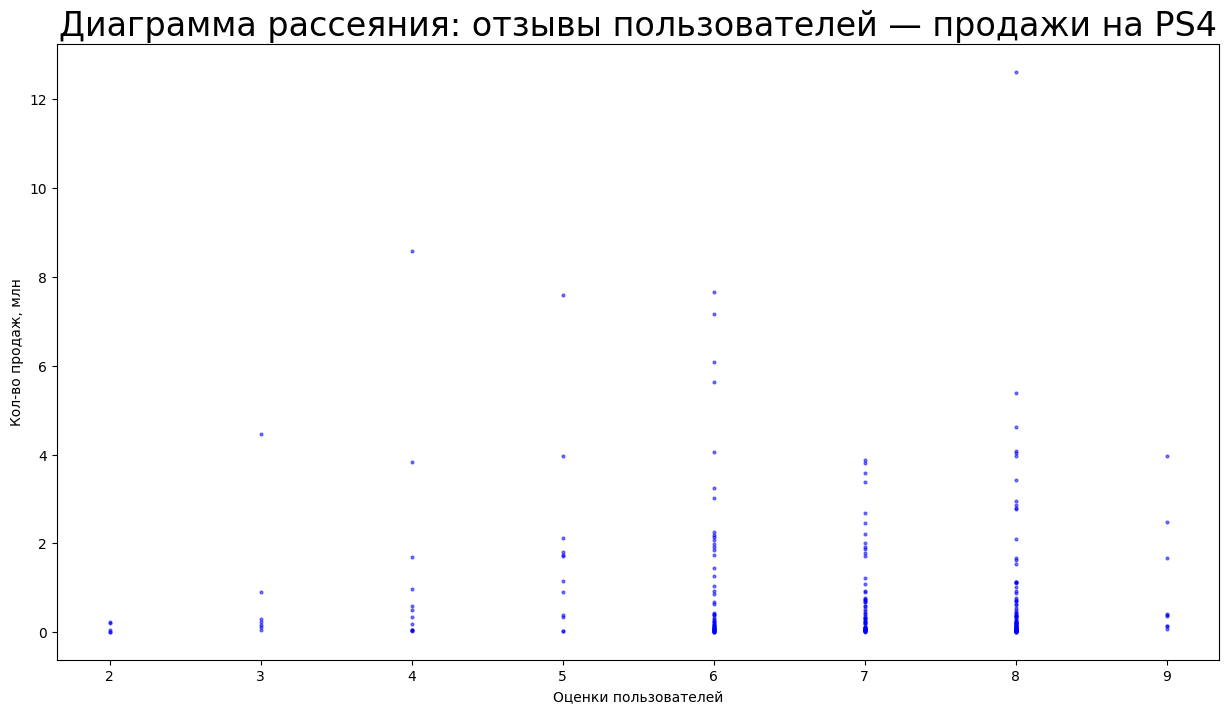

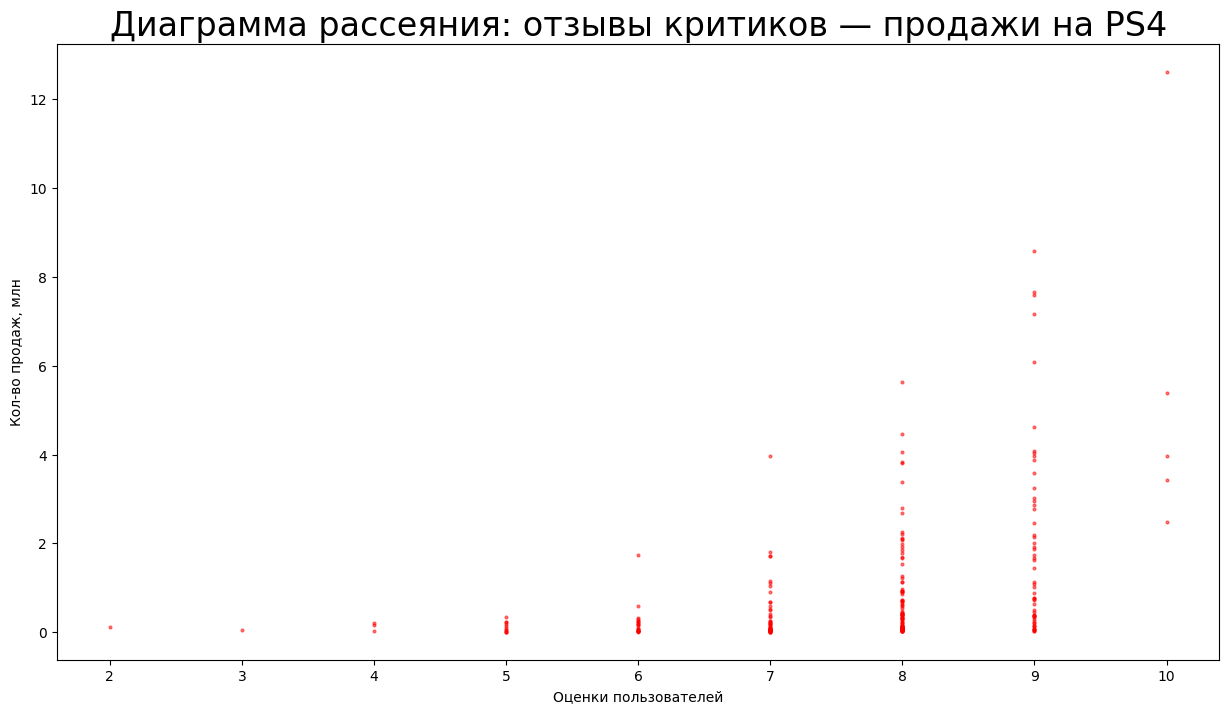

In [66]:
# Диаграмма рассеяния — отзывы пользоватетелей — продажи
data[data['platform'] == 'PS4'].plot(kind='scatter',
        y='total_sales' , x='user_score', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния: отзывы пользователей — продажи на PS4', fontsize=24);
plt.xlabel('Оценки пользователей');
plt.ylabel('Кол-во продаж, млн');

# Диаграмма рассеяния — отзывы критиков — продажи
data[data['platform'] == 'PS4'].plot(kind='scatter',
        y='total_sales' , x='critic_score_10', alpha=0.5, subplots=True, figsize=(15,8), c = 'r', s = 4)
plt.title('Диаграмма рассеяния: отзывы критиков — продажи на PS4', fontsize=24);
plt.xlabel('Оценки пользователей');
plt.ylabel('Кол-во продаж, млн');

In [67]:
data[data['platform'] == 'PS4'][['user_score', 'critic_score_10', 'total_sales']].corr()

,user_score,critic_score_10,total_sales
user_score,1.000000,0.522297,-0.051236
critic_score_10,0.522297,1.000000,0.405709
total_sales,-0.051236,0.405709,1.000000


Вывод. На графиках почти не видна разница между оценками и объемами продаж: бОльшая часть значений на обоих графиках лежит на одном уровне продаж независимо от оценок. 
Это подтвердил коэфициент Пирсона, который близок к нулю. Хотя очевидно, что прямая связь между этими показателями должна быть, невысокие коэфициенты не потому, что связи между значениями нет, а из-за того, что у неё более сложный, не линейный характер.

##### Соотношение выводов с продажами игр на других платформах

Рассмотрим зависимость продаж игр от оценок пользователей и критиков с ближайшими конкурентами лидера продаж: PS3 и XOne.

In [68]:
data[data['platform'] == 'PS3'][['user_score', 'critic_score_10', 'total_sales']].corr()

,user_score,critic_score_10,total_sales
user_score,1.000000,0.606991,0.131331
critic_score_10,0.606991,1.000000,0.424082
total_sales,0.131331,0.424082,1.000000


In [69]:
data[data['platform'] == 'XOne'][['user_score', 'critic_score_10', 'total_sales']].corr()

,user_score,critic_score_10,total_sales
user_score,1.000000,0.460491,-0.084035
critic_score_10,0.460491,1.000000,0.416828
total_sales,-0.084035,0.416828,1.000000


Вывод. Если рассматривать продажи игр на других крупных платформах, то картина не меняется в сравнении с лидирующей платформой: прямая линейная связь почти отсутсвует (значения корреляции < 0.75 - порогового значанечия), связь между ними имеет более сложный характер.

##### Общее распределение игр по жанрам. Жанры с высокими и низкими продажами.

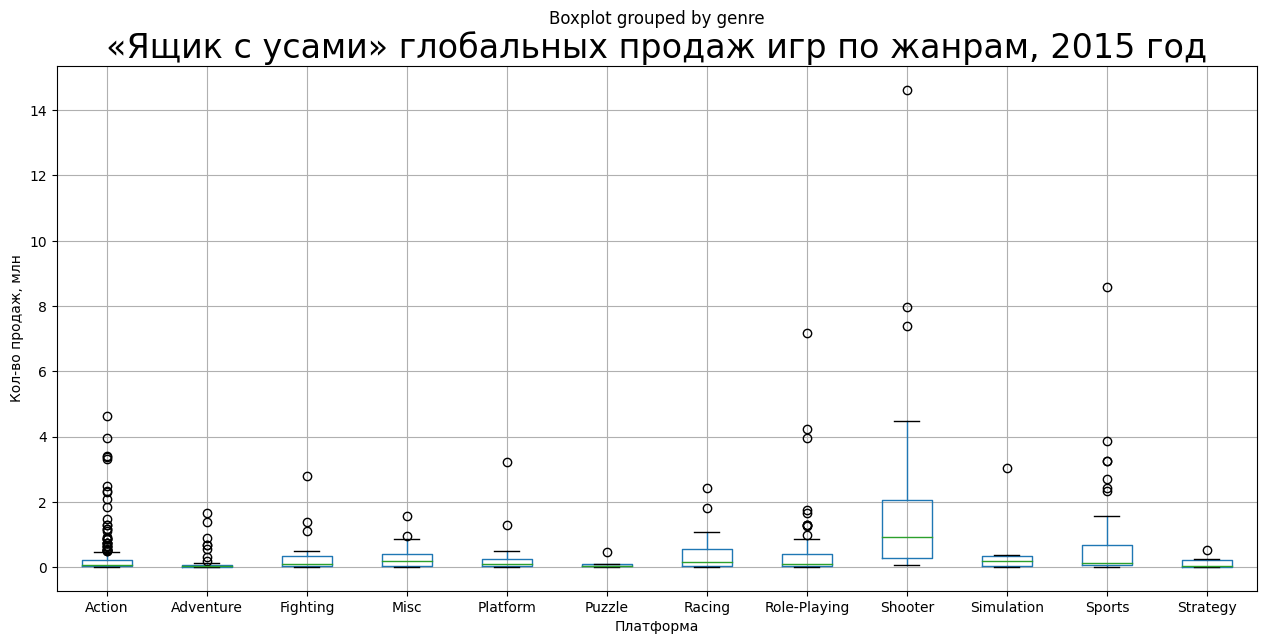

In [70]:
ax = data.query('year_of_release == 2015').boxplot(column='total_sales', by='genre', figsize=(15,7));
ax.set_title('«Ящик с усами» глобальных продаж игр по жанрам, 2015 год', fontsize=24);
ax.set_xlabel('Платформа');
ax.set_ylabel('Кол-во продаж, млн');

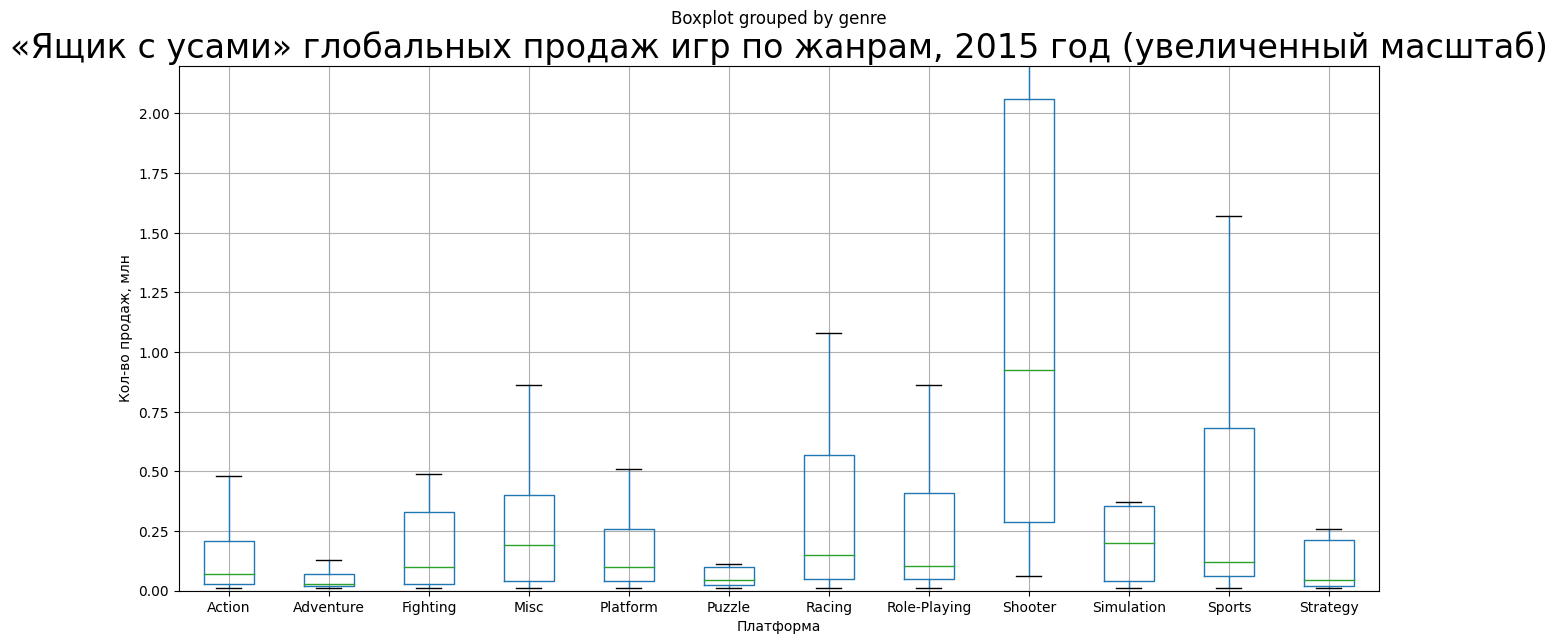

In [71]:
ax = data.query('year_of_release == 2015').boxplot(column='total_sales', by='genre', showfliers=False, figsize=(15,7));
ax.set_ylim(0, 2.2);
ax.set_title('«Ящик с усами» глобальных продаж игр по жанрам, 2015 год (увеличенный масштаб)', fontsize=24);
ax.set_xlabel('Платформа');
ax.set_ylabel('Кол-во продаж, млн');

Вывод. Самый прибыльный жанр: Shooter - его медианные продажи самые высокие; Sports и Racing - тоже имеют высокие продажи и они более стабильно продаются (Q3 на графике выше), чем остальные. Самые невостребованные жанры: Adventure, Puzzle - их медианные продажи самые низкие и продаются нестабильно.

#### Шаг 4. Портрет пользователя для каждого региона (NA, EU, JP)

##### Самые популярные платформы (топ-5)

In [72]:
# сводная таблица по продажам игр по регионам
data_pl = data.query('year_of_release == 2015').pivot_table(index='platform', values=['na_sales', 'jp_sales', \
                                                                                      'eu_sales'], aggfunc='sum')
# отранжируем значения в порядке возрастания. 1 - наибольшее значение
data_pl['na_rank'] = data_pl['na_sales'].rank(ascending=False)
data_pl['jp_rank'] = data_pl['jp_sales'].rank(ascending=False)
data_pl['eu_rank'] = data_pl['eu_sales'].rank(ascending=False)
data_pl

,eu_sales,jp_sales,na_sales,na_rank,jp_rank,eu_rank
platform,,,,,,
3DS,5.06,15.52,6.17,5.0,1.0,5.0
PC,5.57,0.00,2.36,7.0,9.0,4.0
PS3,6.04,3.67,4.99,6.0,4.0,3.0
PS4,51.76,6.31,42.37,1.0,2.0,1.0
PSP,0.00,0.12,0.00,10.0,7.0,10.0
PSV,0.69,4.85,0.39,9.0,3.0,8.0
Wii,0.62,0.00,0.43,8.0,9.0,9.0
WiiU,5.01,3.45,6.76,4.0,5.0,6.0
X360,3.50,0.00,7.36,3.0,9.0,7.0


In [73]:
list_index_pl = data_pl.index.append(pd.Index(['Other'])) # сохраним в отдельную пременную текущий список индексов + Other
list_index_pl

Index(['3DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne',
       'Other'],
      dtype='object')

In [74]:
data_pl = data_pl.reset_index(drop=True) # сброс индексов
data_pl

,eu_sales,jp_sales,na_sales,na_rank,jp_rank,eu_rank
0,5.06,15.52,6.17,5.0,1.0,5.0
1,5.57,0.00,2.36,7.0,9.0,4.0
2,6.04,3.67,4.99,6.0,4.0,3.0
3,51.76,6.31,42.37,1.0,2.0,1.0
4,0.00,0.12,0.00,10.0,7.0,10.0
5,0.69,4.85,0.39,9.0,3.0,8.0
6,0.62,0.00,0.43,8.0,9.0,9.0
7,5.01,3.45,6.76,4.0,5.0,6.0
8,3.50,0.00,7.36,3.0,9.0,7.0
9,18.47,0.17,36.03,2.0,6.0,2.0


In [75]:
# расчет суммы продаж eu other, где rank выше 5
eu_sales_other = round(data_pl.query('eu_rank > 5')['eu_sales'].sum(), 2)
eu_sales_other

9.82

In [76]:
# расчет суммы продаж jp other, где rank выше 5
jp_sales_other = round(data_pl.query('jp_rank > 5')['jp_sales'].sum(), 2)
jp_sales_other

0.29

In [77]:
# расчет суммы продаж na other, где rank выше 5
na_sales_other = round(data_pl.query('na_rank > 5')['na_sales'].sum(), 2)
na_sales_other

8.17

In [78]:
# добавляем полученные значения в новую строку и проставляем rank = 0
new_row = {'eu_sales':eu_sales_other, 'jp_sales':jp_sales_other, 'na_sales':na_sales_other, 'na_rank':0, \
                                                                                            'jp_rank':0, 'eu_rank':0}
data_pl = data_pl.append(new_row, ignore_index=True)
print(data_pl)

    eu_sales  jp_sales  na_sales  na_rank  jp_rank  eu_rank
0       5.06     15.52      6.17      5.0      1.0      5.0
1       5.57      0.00      2.36      7.0      9.0      4.0
2       6.04      3.67      4.99      6.0      4.0      3.0
3      51.76      6.31     42.37      1.0      2.0      1.0
4       0.00      0.12      0.00     10.0      7.0     10.0
5       0.69      4.85      0.39      9.0      3.0      8.0
6       0.62      0.00      0.43      8.0      9.0      9.0
7       5.01      3.45      6.76      4.0      5.0      6.0
8       3.50      0.00      7.36      3.0      9.0      7.0
9      18.47      0.17     36.03      2.0      6.0      2.0
10      9.82      0.29      8.17      0.0      0.0      0.0


In [79]:
data_pl.index = list_index_pl # возвращаем индексы по платформам в том же порядке + Other
data_pl

,eu_sales,jp_sales,na_sales,na_rank,jp_rank,eu_rank
3DS,5.06,15.52,6.17,5.0,1.0,5.0
PC,5.57,0.00,2.36,7.0,9.0,4.0
PS3,6.04,3.67,4.99,6.0,4.0,3.0
PS4,51.76,6.31,42.37,1.0,2.0,1.0
PSP,0.00,0.12,0.00,10.0,7.0,10.0
PSV,0.69,4.85,0.39,9.0,3.0,8.0
Wii,0.62,0.00,0.43,8.0,9.0,9.0
WiiU,5.01,3.45,6.76,4.0,5.0,6.0
X360,3.50,0.00,7.36,3.0,9.0,7.0
XOne,18.47,0.17,36.03,2.0,6.0,2.0


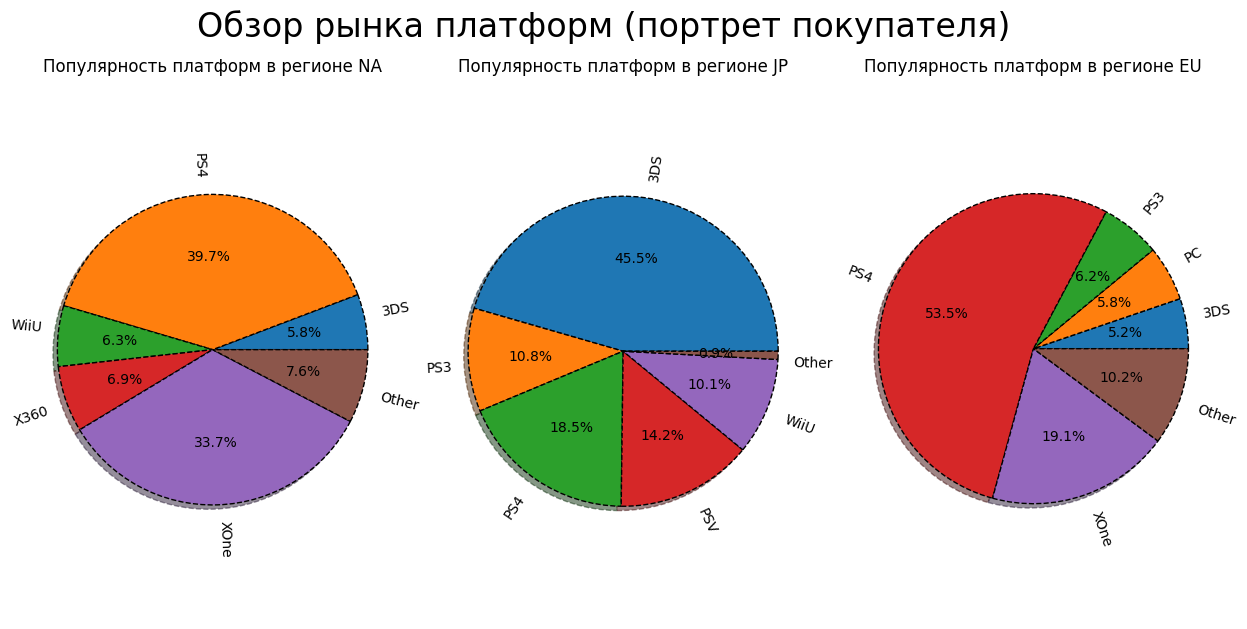

In [80]:
plt.subplots(figsize = (15, 7)) # сетка для отрисовки
regions = ['na', 'jp', 'eu'] # названия регионов
for i, region in enumerate(regions):
    column_name = '{}_sales'.format(region) # имя столбца названия региона
    current = data_pl.loc[data_pl['{}_rank'.format(region)] <= 5, '{}_sales'.format(region)] 
    current.plot(y= column_name, kind = 'pie', rotatelabels=True, autopct='%1.1f%%', shadow=True, \
                 wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, ax = plt.subplot(1, len(regions), i + 1))
    plt.axis("equal")
    plt.title('Популярность платформ в регионе {}'.format(region.upper()))
    plt.ylabel('')
plt.suptitle('Обзор рынка платформ (портрет покупателя)', fontsize=24);

Вывод.

*Рассматривались игровые платформы по последним полным данным - 2015 год.*

**Северная Америка**

На этом рынке 2 основных конкуретнта с небольшой разницей: PS4 (Япония) и XOne (США). Небольшая разница в объемах продаж обуслевлена тем, что PS4 в целом по миру более популярна, исходя из графика лидирующих платформ, но XOne, согласно открытым источникам данных, продавалась на местном рынке на $100 дешевле, что дало ей конкурентное преимущество приблизится к мировому лидеру на тот период.

**Япония**

На японском рынке в том же году подавляющее большинство геймеров отдавали предпочтение мобильной платформе 3DS, а затем стационарной модели PS4. XOne от американского производителя даже не вошло в топ-5 и занимает незначительную часть рынка.

**Европа**

На европейском рынке львиную долю занимает PS4, а XOne уступает почти в 3 раза.

##### Самые популярные жанры (топ-5)

In [81]:
# сводная таблица по продажам игр по жанрам
data_genre = data.query('year_of_release == 2015').pivot_table(index='genre', values=['na_sales', 'jp_sales', 'eu_sales'], \
                                                               aggfunc='sum')
# отранжируем значения в порядке возрастания. 1 - наибольшее значение
data_genre['na_rank'] = data_genre['na_sales'].rank(ascending=False)
data_genre['jp_rank'] = data_genre['jp_sales'].rank(ascending=False)
data_genre['eu_rank'] = data_genre['eu_sales'].rank(ascending=False)
data_genre

,eu_sales,jp_sales,na_sales,na_rank,jp_rank,eu_rank
genre,,,,,,
Action,24.14,15.98,24.39,2.0,1.0,2.0
Adventure,3.35,1.04,2.89,7.0,7.0,7.0
Fighting,2.38,0.79,3.70,6.0,8.0,9.0
Misc,3.60,2.15,4.82,5.0,4.0,6.0
Platform,1.81,1.31,2.49,8.0,6.0,10.0
Puzzle,0.12,0.52,0.06,12.0,10.0,12.0
Racing,4.75,0.28,2.09,9.0,11.0,5.0
Role-Playing,12.93,6.80,13.93,4.0,2.0,4.0
Shooter,24.38,2.73,31.94,1.0,3.0,1.0


In [82]:
list_index_genre = data_genre.index.append(pd.Index(['Other'])) # сохраним в отдельную пременную текущий список индексов + Other
list_index_genre

Index(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy',
       'Other'],
      dtype='object')

In [83]:
data_genre = data_genre.reset_index(drop=True) # сброс индексов
data_genre

,eu_sales,jp_sales,na_sales,na_rank,jp_rank,eu_rank
0,24.14,15.98,24.39,2.0,1.0,2.0
1,3.35,1.04,2.89,7.0,7.0,7.0
2,2.38,0.79,3.70,6.0,8.0,9.0
3,3.60,2.15,4.82,5.0,4.0,6.0
4,1.81,1.31,2.49,8.0,6.0,10.0
5,0.12,0.52,0.06,12.0,10.0,12.0
6,4.75,0.28,2.09,9.0,11.0,5.0
7,12.93,6.80,13.93,4.0,2.0,4.0
8,24.38,2.73,31.94,1.0,3.0,1.0
9,2.47,1.60,1.20,10.0,5.0,8.0


In [84]:
# расчет суммы продаж eu other, где rank выше 5
eu_sales_other_g = round(data_pl.query('eu_rank > 5')['eu_sales'].sum(), 2)
eu_sales_other_g

9.82

In [85]:
# расчет суммы продаж jp other, где rank выше 5
jp_sales_other_g = round(data_pl.query('jp_rank > 5')['jp_sales'].sum(), 2)
jp_sales_other_g

0.29

In [86]:
# расчет суммы продаж na other, где rank выше 5
na_sales_other_g = round(data_pl.query('na_rank > 5')['na_sales'].sum(), 2)
na_sales_other_g

8.17

In [87]:
# добавляем полученные значения в новую строку и проставляем rank = 0
new_row = {'eu_sales':eu_sales_other, 'jp_sales':jp_sales_other, 'na_sales':na_sales_other, 'na_rank':0, \
                                                                                            'jp_rank':0, 'eu_rank':0}
data_genre = data_genre.append(new_row, ignore_index=True)
print(data_genre)

    eu_sales  jp_sales  na_sales  na_rank  jp_rank  eu_rank
0      24.14     15.98     24.39      2.0      1.0      2.0
1       3.35      1.04      2.89      7.0      7.0      7.0
2       2.38      0.79      3.70      6.0      8.0      9.0
3       3.60      2.15      4.82      5.0      4.0      6.0
4       1.81      1.31      2.49      8.0      6.0     10.0
5       0.12      0.52      0.06     12.0     10.0     12.0
6       4.75      0.28      2.09      9.0     11.0      5.0
7      12.93      6.80     13.93      4.0      2.0      4.0
8      24.38      2.73     31.94      1.0      3.0      1.0
9       2.47      1.60      1.20     10.0      5.0      8.0
10     15.81      0.73     18.77      3.0      9.0      3.0
11      0.98      0.16      0.58     11.0     12.0     11.0
12      9.82      0.29      8.17      0.0      0.0      0.0


In [88]:
data_genre.index = list_index_genre # возвращаем индексы по платформам в том же порядке + Other
data_genre

,eu_sales,jp_sales,na_sales,na_rank,jp_rank,eu_rank
Action,24.14,15.98,24.39,2.0,1.0,2.0
Adventure,3.35,1.04,2.89,7.0,7.0,7.0
Fighting,2.38,0.79,3.70,6.0,8.0,9.0
Misc,3.60,2.15,4.82,5.0,4.0,6.0
Platform,1.81,1.31,2.49,8.0,6.0,10.0
Puzzle,0.12,0.52,0.06,12.0,10.0,12.0
Racing,4.75,0.28,2.09,9.0,11.0,5.0
Role-Playing,12.93,6.80,13.93,4.0,2.0,4.0
Shooter,24.38,2.73,31.94,1.0,3.0,1.0
Simulation,2.47,1.60,1.20,10.0,5.0,8.0


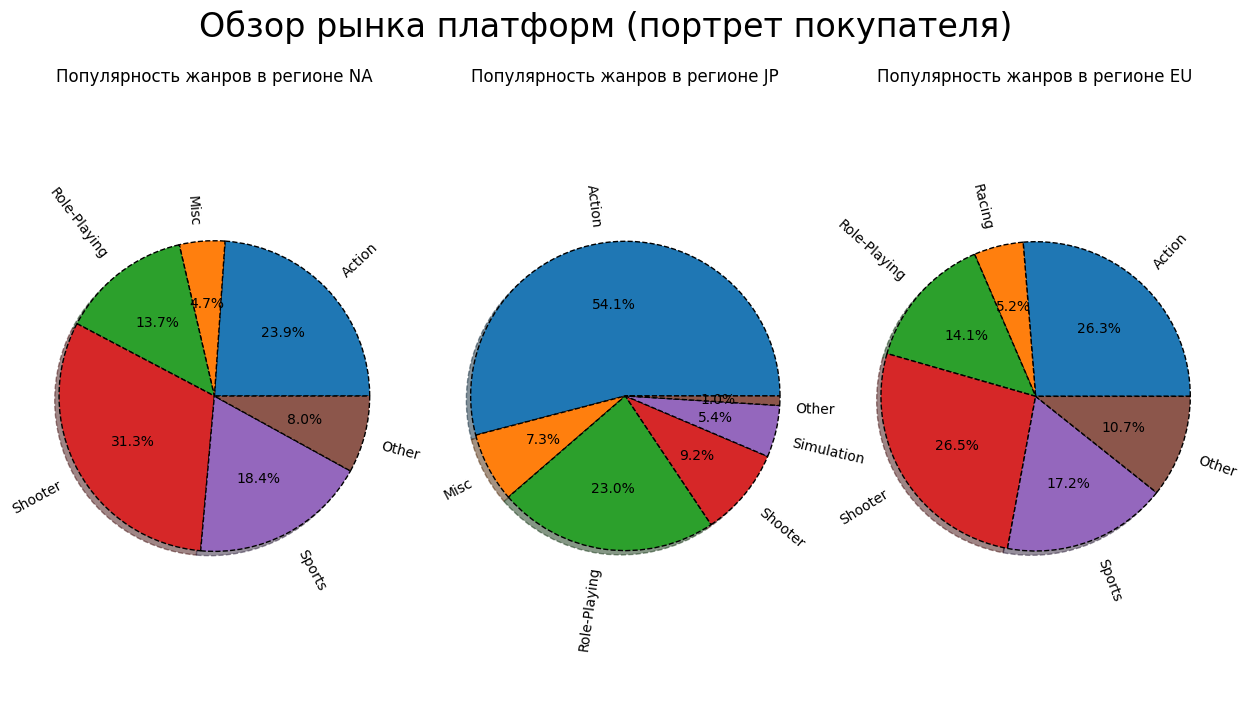

In [89]:
plt.subplots(figsize = (15, 8)) # сетка для отрисовки
regions = ['na', 'jp', 'eu'] # названия регионов
for i, region in enumerate(regions):
    column_name = '{}_sales'.format(region) # имя столбца названия региона
    current = data_genre.loc[data_genre['{}_rank'.format(region)] <= 5, '{}_sales'.format(region)] 
    current.plot(y= column_name, kind = 'pie', rotatelabels=True, autopct='%1.1f%%', shadow=True, \
                 wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, ax = plt.subplot(1, len(regions), i + 1))
    plt.axis("equal")
    plt.title('Популярность жанров в регионе {}'.format(region.upper()))
    plt.ylabel('')
plt.suptitle('Обзор рынка платформ (портрет покупателя)', fontsize=24); 

Вывод. 

*Рассматривались игровые жанры по последним полным данным - 2015 год.*

Во всех регионах предпочтение отдается динамичным играм - Action и Shooter. В Японии второе место по популярности принадлежит Role-Playing, этот жанр был придуман и разработан специально для местного рынка.

##### Влияние рейтинга ESRB на продажи в каждом регионе

**Оценки ESRB:**

**E** - подходит для всех возрастных категорий.

**E10+** - подходит для лиц старше 10 лет.

**T** - подходит для лиц старше 13 лет.

**M** - подходит для лиц старше 17 лет.

In [90]:
# сводная таблица по продажам игр по жанрам
data_esrb = data.query('year_of_release == 2015').pivot_table(index='rating', values=['na_sales', 'jp_sales', \
                                                                                      'eu_sales'], aggfunc='sum')
# отранжируем значения в порядке возрастания. 1 - наибольшее значение
data_esrb['na_rank'] = data_esrb['na_sales'].rank(ascending=False)
data_esrb['jp_rank'] = data_esrb['jp_sales'].rank(ascending=False)
data_esrb['eu_rank'] = data_esrb['eu_sales'].rank(ascending=False)
data_esrb

,eu_sales,jp_sales,na_sales,na_rank,jp_rank,eu_rank
rating,,,,,,
E,21.22,4.18,18.62,2.0,2.0,2.0
E10+,7.73,2.82,14.06,3.0,4.0,4.0
M,29.00,3.09,31.36,1.0,3.0,1.0
T,10.53,5.43,13.91,4.0,1.0,3.0


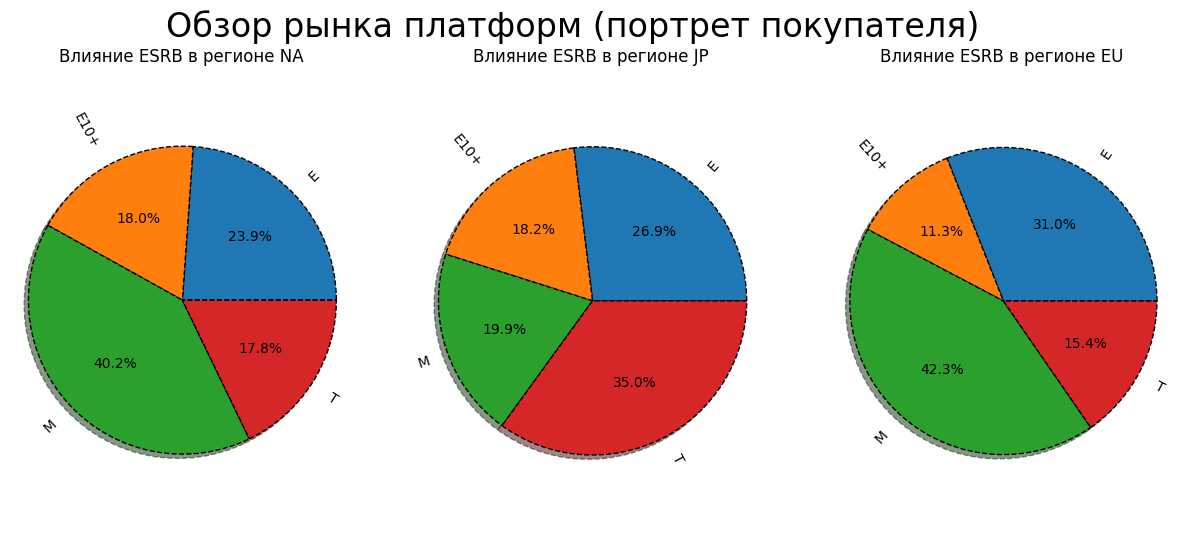

In [91]:
plt.subplots(figsize = (15, 6)) # сетка для отрисовки
regions = ['na', 'jp', 'eu'] # названия регионов
for i, region in enumerate(regions):
    column_name = '{}_sales'.format(region) # имя столбца названия региона
    current = data_esrb.loc[data_esrb['{}_rank'.format(region)] <= 5, '{}_sales'.format(region)] 
    current.plot(y= column_name, kind = 'pie', rotatelabels=True, autopct='%1.1f%%', shadow=True, \
                 wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, ax = plt.subplot(1, len(regions), i + 1))
    plt.axis("equal")
    plt.title('Влияние ESRB в регионе {}'.format(region.upper()))
    plt.ylabel('')
plt.suptitle('Обзор рынка платформ (портрет покупателя)', fontsize=24); 

Вывод.
В Северной Америке и Европе популярностью пользуются игры для подростков с реалистичными сценами насилия. В Японии чаще продаются игры для детей от 13 лет, где может присутствовать ненормативная лексика, употребление табака, алкоголя и т.п.

#### Шаг 5. Проверка гипотез

##### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем гипотезу о том, что средние пользовательские оценки на платформе XOne (первая группа) и средние пользовательские оценки на платформе PC (вторая группа) равны.

Проверяем двусторонюю альтернативную гипотезу - средние значения двух групп не равны, т.е. не важно больше или меньше.

**Нулевая гипотеза:** средние оценки из двух групп одинаковы.

**Альтернативная гипотеза:** средние оценки первой группы не равны средним оценкам второй группы.

In [92]:
# оценки первой группы
first_group_scores = data[data[['user_score']].notnull().all(1)]. \
                     query('year_of_release == 2015 and platform == "XOne"')['user_score']
# оценки второй группы
second_group_scores = data[data[['user_score']].notnull().all(1)]. \
                      query('year_of_release == 2015 and platform == "PC"')['user_score']

In [93]:
# проверка на равенство двух выборок
if len(first_group_scores) == len(second_group_scores):
    print('выборки равны, используем equal_var = True')
else:
    print('выборки не равны, используем equal_var = False') 

выборки не равны, используем equal_var = False


In [94]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(first_group_scores, second_group_scores, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.6206470796289887
Не получилось отвергнуть нулевую гипотезу


Вывод. Статистический тест на заданном уровне занчимости 0.05 не отвергает нулевую гипотезу о равенстве средних оценок пользователей на платформах PC и XOne.

##### Средние пользовательские рейтинги жанров Action и Sports разные

Сформулируем гипотезу о том, что средние пользовательские рейтинги жанра Action (первая группа) и средние пользовательские оценки жанра Sports (вторая группа) равны.

Проверяем двусторонюю альтернативную гипотезу - средние значения двух групп не равны, т.е. не важно больше или меньше.

**Нулевая гипотеза:** среднии оценки из двух групп одинаковы.

**Альтернативная гипотеза:** средние оценки первой группы не равны средним оценкам второй группы.

In [95]:
# оценки первой группы
action_group_scores = data[data[['user_score']].notnull().all(1)].query('genre == "Action"')['user_score']
# оценки второй группы
sports_group_scores = data[data[['user_score']].notnull().all(1)].query('genre == "Sports"')['user_score']

In [96]:
# проверка на равенство двух выборок
if len(action_group_scores) == len(sports_group_scores):
    print('выборки равны, используем equal_var = True')
else:
    print('выборки не равны, используем equal_var = False') 

выборки не равны, используем equal_var = False


In [97]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(action_group_scores, sports_group_scores, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.15990109432655958
Не получилось отвергнуть нулевую гипотезу


Вывод. На уровне значимости 0,05 принимаем гипотезу, что средние пользовательские рейтинги равны между жанрами Action и Sports.

В обоих гипотезах рассматриваются 2 независимовые выборки и проверяется двустороняя гипотеза о равенстве средних двух генеральных совокупностей.

#### Шаг 6. Общий вывод

В предоставленном датасете интеренет-магазина "Стримчик" предоставлены данные о продажах и рейтингах видеоигр за период 1980-2015 гг, плюс неполные данные за 2016г. В нем обнаружено большое количество пропусков в рейтингах, которые невозможно заполнить синтетическими данными. 

**Проведен исследовательский анализ, который показал следующее:**

1. С 1991 по 2016 год начался резкий рост продаж игр с нескольких десятков до нескольких сотен в год, пик пришелся на 2008-2009 года.
2. Срок жизни ировой платформы в среднем составляет 11-12 лет, продажи игр за этот период происходят согласно нормальному распределению: пик продаж приходится на середину срока.
3. Лидирующие платформы за актуальный 2015 год: PS4, XOne, 3DS. Из персепктивных можно выделить: PC, PSV, 3DS и WiiU.
4. За 2015 год медианные продажи всех платформ составили менее 200 тыс копий, WiiU и XOne превысили этот показатель. Отдельно выделяется PS4 с самым большим размахом продаж - выше 14 млн копий.
5. Корреляция между объемами продаж игр и их рейтингами не выявлена как на уровне одной популярной платформы, так и на всех остальных вместе взятых. Это означает, что связь носит не линейный, а более сложный характер.
6. Самые прибыльные жанры: Action, Sports, Shooter, доля их продаж которых растет на рынке. Самые невостребованные жанры: Strategy, Adventure, Puzzle, их доля самая низкая.

**Составлены предпочтения пользователей по продажам игр в следующих регионах:**

*Северная Америка*
- На этом рынке 2 основных конкуретнта: PS4 (Япония) и XOne (США) с небольшой разницей в пользу первого. 
- Популярные жанры: Shooter, Action
- По оценкам ESRB наиболее больше продаются игры для подростков с реалистичными сценами насилия

*Япония*
- На японском рынке подавляющее большинство геймеров отдавали предпочтение мобильной платформе 3DS, а затем стационарной модели PS4. XOne от американского производителя даже не вошла в топ-5 и занимает незначительную часть рынка.
- Популярные жанры: Action, Role-Playing
- По оценкам ESRB наиболее больше продаются игры для детей от 13 лет, где может присутствовать ненормативная лексика, употребление табака, алкоголя и т.п.

*Европа*
- На европейском рынке львиную долю занимает PS4, а XOne уступает почти в 3 раза.
- Популярные жанры: Action, Shooter
- По оценкам ESRB наиболее больше продаются игры для подростков с реалистичными сценами насилия

**Выполнена проверка гипотез:**

- Не удалось отвергнуть гипотезу о равенстве средних оценок пользователей на платформах PC и XOne на уровне значимости 0.05. 
- На уровне значимости 0,05 принимаем гипотезу, что средние пользовательские рейтинги равны между жанрами Action и Sports.